# Data extract through AIP and Preprocessing 

In [1]:
from alpha_vantage.timeseries import TimeSeries
api_key = 'RDW63LUED9U3S55M'
symbol = 'RELIANCE.BSE'

def get_stock_data(symbol, api_key):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    return data
def prepare_data(data):
    data = data[['1. open', '2. high', '3. low', '4. close', '5. volume']]
    data.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    return data

data = get_stock_data(symbol,api_key)
df = prepare_data(data)



In [2]:
df =df.reset_index()
df


,date,Open,High,Low,Close,Volume
0,2024-02-23,2971.4000,2996.1500,2965.2500,2986.3500,653001.0
1,2024-02-22,2937.9500,2969.1000,2916.0000,2963.3500,212597.0
2,2024-02-21,2943.8500,2977.0000,2916.1500,2938.2000,103405.0
3,2024-02-20,2949.9000,2949.9000,2924.0000,2940.7500,104430.0
4,2024-02-19,2921.3500,2958.8000,2907.5500,2946.1500,163441.0
...,...,...,...,...,...,...
4714,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0
4715,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0
4716,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0
4717,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0


In [3]:
df['Tommorow']=df['Close'].shift(-1)
df.head()

,date,Open,High,Low,Close,Volume,Tommorow
0,2024-02-23,2971.40,2996.15,2965.25,2986.35,653001.0,2963.35
1,2024-02-22,2937.95,2969.10,2916.00,2963.35,212597.0,2938.20
2,2024-02-21,2943.85,2977.00,2916.15,2938.20,103405.0,2940.75
3,2024-02-20,2949.90,2949.90,2924.00,2940.75,104430.0,2946.15
4,2024-02-19,2921.35,2958.80,2907.55,2946.15,163441.0,2921.35


In [4]:
df['Target']=(df['Tommorow']>df['Close']).astype(int)

In [13]:
df = df.dropna(axis=0, how='any')
df.tail()

,date,Open,High,Low,Close,Volume,Tommorow,Target
4713,2005-01-10,373.3203,377.4092,361.3601,363.5750,8748949.0,368.5840,1
4714,2005-01-07,359.8269,373.1159,359.5202,368.5840,16969845.0,358.4297,0
4715,2005-01-06,357.7824,365.6195,356.1468,358.4297,13446517.0,361.1217,1
4716,2005-01-05,358.1230,363.9158,351.8194,361.1217,16954266.0,361.7351,1
4717,2005-01-04,364.5972,371.3782,360.8491,361.7351,10059943.0,370.1173,1


In [15]:
df.shape

(4718, 8)

,date,Open,High,Low,Close,Volume,Tommorow,Target
3000,2011-12-21,664.5706,687.3611,658.6450,681.2076,1665515.0,650.4861,0
3001,2011-12-20,674.5984,675.7379,646.4749,650.4861,2669330.0,670.8151,1
3002,2011-12-19,656.2749,674.4161,652.1726,670.8151,2023980.0,659.1009,0
3003,2011-12-16,685.1732,693.9703,655.4543,659.1009,2286446.0,682.5294,1
3004,2011-12-15,667.5789,686.4039,659.8757,682.5294,2675197.0,676.1482,0
...,...,...,...,...,...,...,...,...
3995,2007-11-30,2568.9435,2627.6976,2565.5249,2598.7992,2217313.0,2569.3082,0
3996,2007-11-29,2548.0219,2620.7236,2548.0219,2569.3082,2143000.0,2540.0452,0
3997,2007-11-28,2590.8224,2619.9943,2525.4593,2540.0452,2349462.0,2590.8224,1
3998,2007-11-27,2612.4278,2627.2873,2572.5901,2590.8224,1686396.0,2628.0622,1


# Data Analysis and Visualization

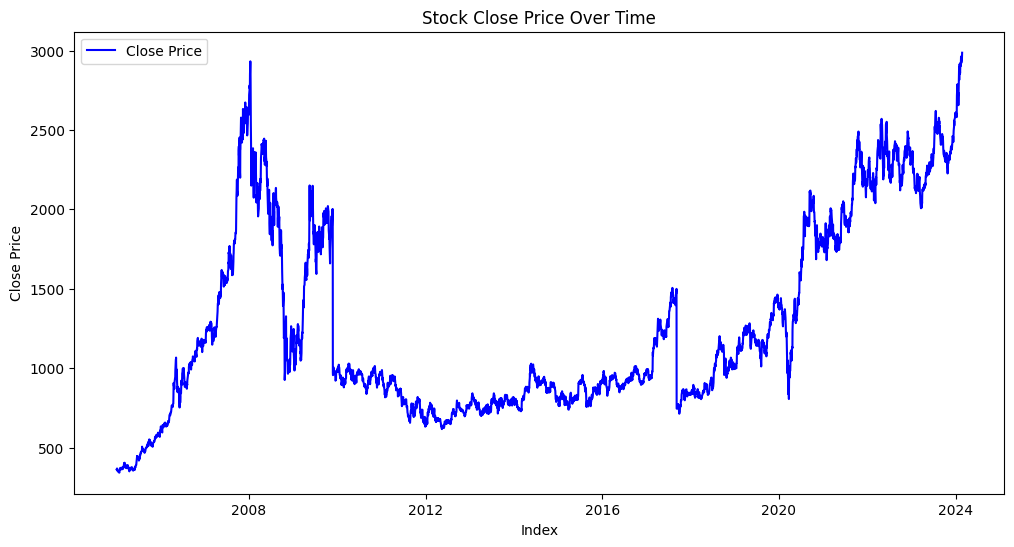

In [17]:
import matplotlib.pyplot as plt

# Plotting the closing prices using numerical index
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Close'], label='Close Price', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [6]:
df.describe()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
count,4708,4708.000000,4708.000000,4708.000000,4708.000000,4.708000e+03,4708.000000
mean,2014-07-22 00:43:25.947323648,1268.814708,1285.184391,1252.046889,1268.113529,2.981169e+06,0.741079
min,2005-01-03 00:00:00,344.152500,347.798500,339.518500,341.699200,0.000000e+00,0.000000
25%,2009-10-13 12:00:00,823.192300,830.120675,812.287125,822.064225,4.218022e+05,0.000000
50%,2014-07-16 12:00:00,989.084250,1002.804200,975.364400,988.058750,8.698080e+05,1.000000
75%,2019-05-07 06:00:00,1805.006700,1826.190775,1775.185550,1800.859125,2.540924e+06,1.000000
max,2024-02-08 00:00:00,2931.768100,2964.677700,2864.450000,2932.041700,8.021841e+08,1.000000
std,NaN,606.678792,614.877593,598.711635,606.803088,2.070018e+07,0.438089


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4708 entries, 0 to 4707
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   4708 non-null   datetime64[ns]
 1   Open                   4708 non-null   float64       
 2   High                   4708 non-null   float64       
 3   Low                    4708 non-null   float64       
 4   Close                  4708 non-null   float64       
 5   Volume                 4708 non-null   float64       
 6   Market_High_Indicator  4708 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 257.6 KB


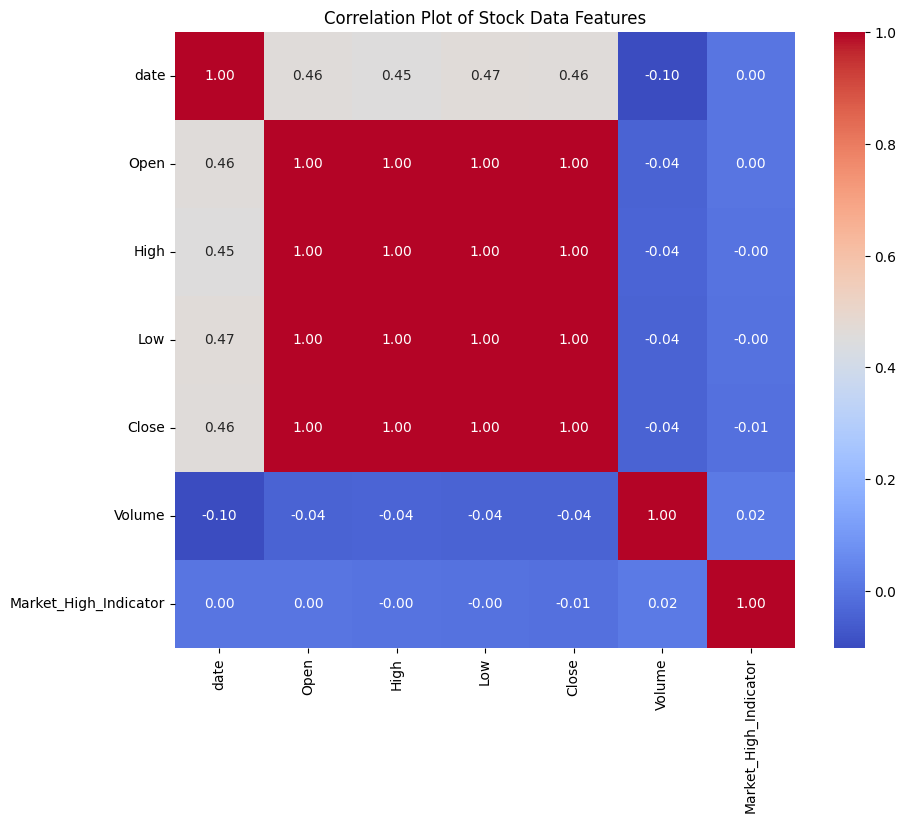

In [8]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Plot of Stock Data Features')
plt.show()


In [9]:
df.head()

,date,Open,High,Low,Close,Volume,Market_High_Indicator
0,2024-02-08,2895.6001,2919.7500,2856.70,2902.9500,98849.0,0
1,2024-02-07,2870.0000,2898.0000,2858.45,2883.3999,320512.0,0
2,2024-02-06,2887.3999,2887.3999,2840.80,2856.8000,115081.0,1
3,2024-02-05,2921.2000,2940.0000,2864.00,2877.0500,128072.0,1
4,2024-02-02,2864.4500,2949.8999,2864.45,2914.7500,653622.0,1


# Model training

In [10]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df.drop(columns=['Market_High_Indicator', 'High', 'date'])
y = df['Market_High_Indicator']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3766, 4)
X_test shape: (942, 4)
y_train shape: (3766,)
y_test shape: (942,)


In [12]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler with feature_range=(0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

# Predict and Evaluate the Model

In [14]:
# Predict on the scaled test data
predictions = model.predict(X_test_scaled)


In [15]:
from sklearn.metrics import accuracy_score

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.7388535031847133


# Predict Next day Market

In [17]:
# Extract the last row of the DataFrame
last_row = df.iloc[-1]

# Extract the relevant features (excluding 'High') and reshape into the format expected by your model
# X_new = np.array([[937.70, 918.70, 937.70, 924.45, 380102.0]])
X_new = last_row[['Open', 'Low', 'Close', 'Volume']].values.reshape(1, -1)

# Scale the new feature data using the same scaler used for training
X_new_scaled = scaler.transform(X_new)

# Predict the next day's high price
next_day_high = model.predict(X_new_scaled)

print("Predicted next day's price:", next_day_high)


Predicted next day's high price: [1]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
